# House Price Analysis 
## Exploring Apartment Listings in Tirana

### The Problem

Real estate markets are driven by many factors: location, size, floor, number of rooms, furnishing level, and other amenities. Understanding how these variables relate to apartment prices is essential for buyers, sellers, and agents.

In this notebook we analyze a JSON dataset containing apartment listings (mainly in Tirana, Albania). Each listing describes:
- Price (in EUR)
- Surface area in square meters
- Number of rooms (bedrooms, bathrooms, living rooms, balconies)
- Floor
- Furnishing status
- Location (address and coordinates)

### Our Mission

We will:
1.  **Load and inspect the data** from a JSON file
2.  **Convert JSON → Pandas DataFrame** for easier analysis
3.  **Clean and rename columns** to more meaningful English names
4.  **Perform EDA (Exploratory Data Analysis)** to understand distributions and relationships
5.  **Data Preprocessing** - Preparing data for the algorithm
6.  **Train-Test Split** - Separating study material from the final exam
7.  **Baseline Model** - Building a simple ....
8.  **Visualization** - Seeing how the model thinks
9.  **Cross-Validation** - Ensuring our results are reliable, not lucky
10. **Hyperparameter Tuning** - Optimizing the model
11. **Final Evaluation** - Comprehensive performance assessment
12. **Ethical Considerations** - Understanding the limits and responsibilities


## Phase 1: Core Libraries

We start by importing the core Python libraries for data analysis and visualization, and by setting some basic plotting preferences.

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization Settings
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Phase 2: Data Loading & Exploration

In this step we load the `house_price.json` file into a Pandas DataFrame, check its size, and preview the raw columns and a few example rows.

In [2]:
# Load data from JSON file
df = pd.read_json("house_price.json")

print("DATASET OVERVIEW")
print(f"Number of listings (rows): {df.shape[0]}")
print(f"Number of features (columns): {df.shape[1]}")

print("\nColumn names (raw):")
print(df.columns.tolist())

# Preview first 5 rows
df.head()

DATASET OVERVIEW
Number of listings (rows): 4505
Number of features (columns): 24

Column names (raw):
['main_property_description_text_content_original_text', 'main_property_floor', 'main_property_furnishing_status', 'main_property_has_carport', 'main_property_has_elevator', 'main_property_has_garage', 'main_property_has_garden', 'main_property_has_parking_space', 'main_property_has_terrace', 'main_property_location_city_zone_city_city_name', 'main_property_location_city_zone_formatted_address', 'main_property_location_lat', 'main_property_location_lng', 'main_property_price', 'main_property_price_currency', 'main_property_property_composition_balconies', 'main_property_property_composition_bathrooms', 'main_property_property_composition_bedrooms', 'main_property_property_composition_kitchens', 'main_property_property_composition_living_rooms', 'main_property_property_status', 'main_property_property_type', 'price_in_euro', 'main_property_property_square']


,main_property_description_text_content_original_text,main_property_floor,main_property_furnishing_status,main_property_has_carport,main_property_has_elevator,main_property_has_garage,main_property_has_garden,main_property_has_parking_space,main_property_has_terrace,main_property_location_city_zone_city_city_name,...,main_property_price_currency,main_property_property_composition_balconies,main_property_property_composition_bathrooms,main_property_property_composition_bedrooms,main_property_property_composition_kitchens,main_property_property_composition_living_rooms,main_property_property_status,main_property_property_type,price_in_euro,main_property_property_square
0,| Përshkrimi i apartamentit:\n\n♦Sallon i boll...,2.0,fully_furnished,NaN,1.0,NaN,NaN,NaN,1.0,tirane,...,EUR,1.0,2.0,3.0,1.0,1.0,for_sale,apartment,400000,205.00
1,Description\t\n\t\t\n\t\t\n\t\t\t\nShitet apar...,7.0,None,1.0,1.0,NaN,NaN,1.0,NaN,tirane,...,EUR,2.0,2.0,3.0,1.0,1.0,for_sale,apartment,483000,151.00
2,SHITET APARTAMENT \n•2+1\n•SIPERFAQE TOTALE 8...,5.0,None,NaN,NaN,NaN,NaN,NaN,1.0,tirane,...,EUR,-1.0,1.0,2.0,-1.0,-1.0,for_sale,apartment,66100,88.10
3,Apartament me Tipologji: 1+1\n\nLokacioni: Miv...,3.0,None,NaN,NaN,NaN,NaN,NaN,NaN,tirane,...,EUR,-1.0,1.0,1.0,1.0,-1.0,for_sale,apartment,89400,66.22
4,Shitet Super Apartament 1+1 në Don Bosko! Gjen...,7.0,fully_furnished,NaN,1.0,NaN,NaN,NaN,NaN,tirane,...,EUR,-1.0,0.0,1.0,-1.0,1.0,for_sale,apartment,80000,76.00


### Understanding the Features

From the JSON structure, each row represents a single apartment listing. Important features include:[file:2]

- **Price and Size**:
  - `price_in_euro`: Final price in EUR
  - `main_property_price`: Original price in the listing
  - `main_property_property_square`: Surface area (m²)

- **Composition**:
  - `main_property_property_composition_bedrooms`
  - `main_property_property_composition_bathrooms`
  - `main_property_property_composition_living_rooms`
  - `main_property_property_composition_balconies`

- **Location**:
  - `main_property_location_city_zone_city_city_name` (e.g., `tirane`)
  - `main_property_location_city_zone_formatted_address`
  - `main_property_location_lat`, `main_property_location_lng`

- **Other details**:
  - `main_property_floor`
  - `main_property_furnishing_status`
  - `main_property_property_type` (e.g., `apartment`)
  - `main_property_property_status` (e.g., `for_sale`)

Next we inspect data quality and basic statistics for these features.[file:2]

### Column Renaming and Selection

The raw JSON contains long technical column names. Here we create clearer English names and then select the main variables of interest for analysis (price, size, rooms, floor, and key amenities).

In [3]:
# Make a copy and rename columns to clearer English names
df_renamed = df.copy()

df_renamed = df_renamed.rename(columns={
    "main_property_description_text_content_original_text": "description",
    "main_property_floor": "floor",
    "main_property_furnishing_status": "furnishing_status",
    "main_property_has_carport": "has_carport",
    "main_property_has_elevator": "has_elevator",
    "main_property_has_garage": "has_garage",
    "main_property_has_garden": "has_garden",
    "main_property_has_parking_space": "has_parking_space",
    "main_property_has_terrace": "has_terrace",
    "main_property_location_city_zone_city_city_name": "city",
    "main_property_price_currency": "price_currency",
    "main_property_property_composition_balconies": "balconies",
    "main_property_property_composition_bathrooms": "bathrooms",
    "main_property_property_composition_bedrooms": "bedrooms",
    "main_property_property_composition_kitchens": "kitchens",
    "main_property_property_composition_living_rooms": "living_rooms",
    "main_property_property_status": "property_status",
    "main_property_property_type": "property_type",
    "price_in_euro": "price_eur",
    "main_property_property_square": "area_sqm"
})

print("Columns after renaming:")
print(df_renamed.columns.tolist())

# Keep and order main analysis columns
main_cols = [
    "price_eur",
    "area_sqm",
    "floor",
    "bedrooms",
    "bathrooms",
    "balconies",
    "living_rooms",
    "furnishing_status",
    "has_elevator",
    "has_parking_space",
    "has_garage",
    "has_terrace",
    "has_garden",
    "city",
    "property_type",
    "property_status",
    "price_currency",
    "description"
]

# Only keep columns that actually exist
main_cols = [c for c in main_cols if c in df_renamed.columns]

df_clean = df_renamed[main_cols].copy()

print("\nShape of cleaned DataFrame:", df_clean.shape)
df_clean.head()

Columns after renaming:
['description', 'floor', 'furnishing_status', 'has_carport', 'has_elevator', 'has_garage', 'has_garden', 'has_parking_space', 'has_terrace', 'city', 'main_property_location_city_zone_formatted_address', 'main_property_location_lat', 'main_property_location_lng', 'main_property_price', 'price_currency', 'balconies', 'bathrooms', 'bedrooms', 'kitchens', 'living_rooms', 'property_status', 'property_type', 'price_eur', 'area_sqm']

Shape of cleaned DataFrame: (4505, 18)


,price_eur,area_sqm,floor,bedrooms,bathrooms,balconies,living_rooms,furnishing_status,has_elevator,has_parking_space,has_garage,has_terrace,has_garden,city,property_type,property_status,price_currency,description
0,400000,205.00,2.0,3.0,2.0,1.0,1.0,fully_furnished,1.0,NaN,NaN,1.0,NaN,tirane,apartment,for_sale,EUR,| Përshkrimi i apartamentit:\n\n♦Sallon i boll...
1,483000,151.00,7.0,3.0,2.0,2.0,1.0,None,1.0,1.0,NaN,NaN,NaN,tirane,apartment,for_sale,EUR,Description\t\n\t\t\n\t\t\n\t\t\t\nShitet apar...
2,66100,88.10,5.0,2.0,1.0,-1.0,-1.0,None,NaN,NaN,NaN,1.0,NaN,tirane,apartment,for_sale,EUR,SHITET APARTAMENT \n•2+1\n•SIPERFAQE TOTALE 8...
3,89400,66.22,3.0,1.0,1.0,-1.0,-1.0,None,NaN,NaN,NaN,NaN,NaN,tirane,apartment,for_sale,EUR,Apartament me Tipologji: 1+1\n\nLokacioni: Miv...
4,80000,76.00,7.0,1.0,0.0,-1.0,1.0,fully_furnished,1.0,NaN,NaN,NaN,NaN,tirane,apartment,for_sale,EUR,Shitet Super Apartament 1+1 në Don Bosko! Gjen...


### Data Quality Checks

Before plotting, we inspect basic statistics, missing values, and duplicates to understand the overall data quality. Outliers and irregular values will also be highlighted by simple descriptive statistics.

In [4]:
print("\nDATA QUALITY CHECK")

# Missing values
missing_total = df.isna().sum().sum()
print(f"Missing Values (total): {missing_total}")

print("\nMissing values per column (top 20):")
print(df_clean.isna().sum().sort_values(ascending=False).head(20))

# Duplicate rows
duplicates = df_clean.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Data types
print("\nData Types (summary):")
print(df_clean.dtypes.value_counts())

print("\nSAMPLE DATA (First 5 Rows)")
df_clean.head()


DATA QUALITY CHECK
Missing Values (total): 24740

Missing values per column (top 20):
has_garden           4318
has_parking_space    4221
has_garage           4148
has_terrace          3997
has_elevator         1755
furnishing_status    1651
floor                 249
bedrooms               36
living_rooms           36
balconies              36
bathrooms              36
price_eur               0
area_sqm                0
city                    0
property_type           0
property_status         0
price_currency          0
description             0
dtype: int64

Duplicate Rows: 16

Data Types (summary):
float64    11
object      6
int64       1
Name: count, dtype: int64

SAMPLE DATA (First 5 Rows)


,price_eur,area_sqm,floor,bedrooms,bathrooms,balconies,living_rooms,furnishing_status,has_elevator,has_parking_space,has_garage,has_terrace,has_garden,city,property_type,property_status,price_currency,description
0,400000,205.00,2.0,3.0,2.0,1.0,1.0,fully_furnished,1.0,NaN,NaN,1.0,NaN,tirane,apartment,for_sale,EUR,| Përshkrimi i apartamentit:\n\n♦Sallon i boll...
1,483000,151.00,7.0,3.0,2.0,2.0,1.0,None,1.0,1.0,NaN,NaN,NaN,tirane,apartment,for_sale,EUR,Description\t\n\t\t\n\t\t\n\t\t\t\nShitet apar...
2,66100,88.10,5.0,2.0,1.0,-1.0,-1.0,None,NaN,NaN,NaN,1.0,NaN,tirane,apartment,for_sale,EUR,SHITET APARTAMENT \n•2+1\n•SIPERFAQE TOTALE 8...
3,89400,66.22,3.0,1.0,1.0,-1.0,-1.0,None,NaN,NaN,NaN,NaN,NaN,tirane,apartment,for_sale,EUR,Apartament me Tipologji: 1+1\n\nLokacioni: Miv...
4,80000,76.00,7.0,1.0,0.0,-1.0,1.0,fully_furnished,1.0,NaN,NaN,NaN,NaN,tirane,apartment,for_sale,EUR,Shitet Super Apartament 1+1 në Don Bosko! Gjen...


## Phase 3: Feature Engineering – Price per Square Meter



### 3.1 Statistical Summary

We start with a statistical summary of all numeric columns (count, mean, standard deviation, min, quartiles, max). This gives us a quick overview of price ranges and apartment sizes.

In [5]:
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
print("NUMERIC COLUMNS:")
print(list(numeric_cols))

print("\nSTATISTICAL SUMMARY (numeric features):")
df_clean[numeric_cols].describe().T  # Transpose for better readability

NUMERIC COLUMNS:
['price_eur', 'area_sqm', 'floor', 'bedrooms', 'bathrooms', 'balconies', 'living_rooms', 'has_elevator', 'has_parking_space', 'has_garage', 'has_terrace', 'has_garden']

STATISTICAL SUMMARY (numeric features):


,count,mean,std,min,25%,50%,75%,max
price_eur,4505.0,184523.566260,144716.288107,67.0,105000.0,148000.0,220000.0,3100000.0
area_sqm,4505.0,136.114063,1079.033432,8.0,73.0,95.0,117.5,50000.0
floor,4256.0,4.400846,3.122044,-1.0,2.0,4.0,6.0,36.0
bedrooms,4469.0,1.847841,0.813182,-1.0,1.0,2.0,2.0,8.0
bathrooms,4469.0,1.254643,0.866441,-1.0,1.0,1.0,2.0,7.0
balconies,4469.0,-0.043186,1.177097,-1.0,-1.0,-1.0,1.0,4.0
living_rooms,4469.0,0.174759,0.991516,-1.0,-1.0,1.0,1.0,3.0
has_elevator,2750.0,0.926909,0.260333,0.0,1.0,1.0,1.0,1.0
has_parking_space,284.0,0.739437,0.439717,0.0,0.0,1.0,1.0,1.0
has_garage,357.0,0.694678,0.461190,0.0,0.0,1.0,1.0,1.0


From this summary we focus on:
- `price_in_euro`: how expensive the apartments are on average and the range of prices
- `main_property_property_square`: typical apartment sizes
- `main_property_floor`: distribution of floors

Very large values are potential luxury or extremely large apartments and will influence later visualizations.

### 3.2 Cleaning and Feature Engineering

For price analysis we need valid price and size information. We:
- Drop rows with missing `price_in_euro` or `main_property_property_square`
- Remove rows where size is zero or negative
- Keep only apartments for sale (if that information exists)
- Create `price_per_sqm = price_in_euro / main_property_property_square`

The new feature `price_per_sqm` is crucial for comparing different listings on a fair basis.

In [13]:
# Only keep columns that actually exist
main_cols = [c for c in main_cols if c in df_renamed.columns]
df_clean = df_renamed[main_cols].copy()

print("\nShape of cleaned DataFrame:", df_clean.shape)
display(df_clean.head())

# ======================================================================
# 4. OPTIONAL FILTERS (APARTMENTS FOR SALE)
# ======================================================================
if "property_type" in df_clean.columns:
    df_clean = df_clean[df_clean["property_type"].isin(["apartment", np.nan])]

if "property_status" in df_clean.columns:
    df_clean = df_clean[df_clean["property_status"].isin(["for_sale", np.nan])]

# Create price_per_sqm if possible
if {"price_eur", "area_sqm"}.issubset(df_clean.columns):
    df_clean["price_per_sqm"] = np.where(
        (df_clean["price_eur"] > 0) & (df_clean["area_sqm"] > 0),
        df_clean["price_eur"] / df_clean["area_sqm"],
        np.nan
    )

print("\nAFTER basic filters (apartment / for_sale):", df_clean.shape)
display(df_clean.head())

# ======================================================================
# 5. DROP COLUMNS WITH TOO MANY NaN (ON CURRENT COLUMNS)
# ======================================================================
threshold = 0.7  # keep columns with at least 70% non-null values

non_null_ratio = df_clean.notna().mean()
print("\nNon-null ratio per column:")
print(non_null_ratio)

cols_to_keep = non_null_ratio[non_null_ratio >= threshold].index.tolist()
cols_to_drop = non_null_ratio[non_null_ratio < threshold].index.tolist()

print("\nColumns to DROP (too many NaN):")
print(cols_to_drop)

df_clean = df_clean[cols_to_keep].copy()

print("\nAFTER dropping high-NaN columns:", df_clean.shape)
display(df_clean.head())

# ======================================================================
# 6. IMPUTE MISSING VALUES FOR ALL REMAINING COLUMNS → df_model
# ======================================================================
df_model = df_clean.copy()

# Numeric columns → fill NaN with median
num_cols = df_model.select_dtypes(include=["number"]).columns.tolist()
for col in num_cols:
    median_val = df_model[col].median()
    df_model[col] = df_model[col].fillna(median_val)

# Categorical / object columns → fill NaN with most frequent value (mode)
cat_cols = df_model.select_dtypes(include=["object", "category"]).columns.tolist()
for col in cat_cols:
    mode_val = df_model[col].mode(dropna=True)
    if len(mode_val) > 0:
        df_model[col] = df_model[col].fillna(mode_val[0])

print("\nAFTER IMPUTATION (df_model ready for EDA / modeling)")
print("Shape:", df_model.shape)
display(df_model.head())


Shape of cleaned DataFrame: (4505, 18)


,price_eur,area_sqm,floor,bedrooms,bathrooms,balconies,living_rooms,furnishing_status,has_elevator,has_parking_space,has_garage,has_terrace,has_garden,city,property_type,property_status,price_currency,description
0,400000,205.00,2.0,3.0,2.0,1.0,1.0,fully_furnished,1.0,NaN,NaN,1.0,NaN,tirane,apartment,for_sale,EUR,| Përshkrimi i apartamentit:\n\n♦Sallon i boll...
1,483000,151.00,7.0,3.0,2.0,2.0,1.0,None,1.0,1.0,NaN,NaN,NaN,tirane,apartment,for_sale,EUR,Description\t\n\t\t\n\t\t\n\t\t\t\nShitet apar...
2,66100,88.10,5.0,2.0,1.0,-1.0,-1.0,None,NaN,NaN,NaN,1.0,NaN,tirane,apartment,for_sale,EUR,SHITET APARTAMENT \n•2+1\n•SIPERFAQE TOTALE 8...
3,89400,66.22,3.0,1.0,1.0,-1.0,-1.0,None,NaN,NaN,NaN,NaN,NaN,tirane,apartment,for_sale,EUR,Apartament me Tipologji: 1+1\n\nLokacioni: Miv...
4,80000,76.00,7.0,1.0,0.0,-1.0,1.0,fully_furnished,1.0,NaN,NaN,NaN,NaN,tirane,apartment,for_sale,EUR,Shitet Super Apartament 1+1 në Don Bosko! Gjen...



AFTER basic filters (apartment / for_sale): (4505, 19)


,price_eur,area_sqm,floor,bedrooms,bathrooms,balconies,living_rooms,furnishing_status,has_elevator,has_parking_space,has_garage,has_terrace,has_garden,city,property_type,property_status,price_currency,description,price_per_sqm
0,400000,205.00,2.0,3.0,2.0,1.0,1.0,fully_furnished,1.0,NaN,NaN,1.0,NaN,tirane,apartment,for_sale,EUR,| Përshkrimi i apartamentit:\n\n♦Sallon i boll...,1951.219512
1,483000,151.00,7.0,3.0,2.0,2.0,1.0,None,1.0,1.0,NaN,NaN,NaN,tirane,apartment,for_sale,EUR,Description\t\n\t\t\n\t\t\n\t\t\t\nShitet apar...,3198.675497
2,66100,88.10,5.0,2.0,1.0,-1.0,-1.0,None,NaN,NaN,NaN,1.0,NaN,tirane,apartment,for_sale,EUR,SHITET APARTAMENT \n•2+1\n•SIPERFAQE TOTALE 8...,750.283768
3,89400,66.22,3.0,1.0,1.0,-1.0,-1.0,None,NaN,NaN,NaN,NaN,NaN,tirane,apartment,for_sale,EUR,Apartament me Tipologji: 1+1\n\nLokacioni: Miv...,1350.045304
4,80000,76.00,7.0,1.0,0.0,-1.0,1.0,fully_furnished,1.0,NaN,NaN,NaN,NaN,tirane,apartment,for_sale,EUR,Shitet Super Apartament 1+1 në Don Bosko! Gjen...,1052.631579



Non-null ratio per column:
price_eur            1.000000
area_sqm             1.000000
floor                0.944728
bedrooms             0.992009
bathrooms            0.992009
balconies            0.992009
living_rooms         0.992009
furnishing_status    0.633518
has_elevator         0.610433
has_parking_space    0.063041
has_garage           0.079245
has_terrace          0.112764
has_garden           0.041509
city                 1.000000
property_type        1.000000
property_status      1.000000
price_currency       1.000000
description          1.000000
price_per_sqm        1.000000
dtype: float64

Columns to DROP (too many NaN):
['furnishing_status', 'has_elevator', 'has_parking_space', 'has_garage', 'has_terrace', 'has_garden']

AFTER dropping high-NaN columns: (4505, 13)


,price_eur,area_sqm,floor,bedrooms,bathrooms,balconies,living_rooms,city,property_type,property_status,price_currency,description,price_per_sqm
0,400000,205.00,2.0,3.0,2.0,1.0,1.0,tirane,apartment,for_sale,EUR,| Përshkrimi i apartamentit:\n\n♦Sallon i boll...,1951.219512
1,483000,151.00,7.0,3.0,2.0,2.0,1.0,tirane,apartment,for_sale,EUR,Description\t\n\t\t\n\t\t\n\t\t\t\nShitet apar...,3198.675497
2,66100,88.10,5.0,2.0,1.0,-1.0,-1.0,tirane,apartment,for_sale,EUR,SHITET APARTAMENT \n•2+1\n•SIPERFAQE TOTALE 8...,750.283768
3,89400,66.22,3.0,1.0,1.0,-1.0,-1.0,tirane,apartment,for_sale,EUR,Apartament me Tipologji: 1+1\n\nLokacioni: Miv...,1350.045304
4,80000,76.00,7.0,1.0,0.0,-1.0,1.0,tirane,apartment,for_sale,EUR,Shitet Super Apartament 1+1 në Don Bosko! Gjen...,1052.631579



AFTER IMPUTATION (df_model ready for EDA / modeling)
Shape: (4505, 13)


,price_eur,area_sqm,floor,bedrooms,bathrooms,balconies,living_rooms,city,property_type,property_status,price_currency,description,price_per_sqm
0,400000,205.00,2.0,3.0,2.0,1.0,1.0,tirane,apartment,for_sale,EUR,| Përshkrimi i apartamentit:\n\n♦Sallon i boll...,1951.219512
1,483000,151.00,7.0,3.0,2.0,2.0,1.0,tirane,apartment,for_sale,EUR,Description\t\n\t\t\n\t\t\n\t\t\t\nShitet apar...,3198.675497
2,66100,88.10,5.0,2.0,1.0,-1.0,-1.0,tirane,apartment,for_sale,EUR,SHITET APARTAMENT \n•2+1\n•SIPERFAQE TOTALE 8...,750.283768
3,89400,66.22,3.0,1.0,1.0,-1.0,-1.0,tirane,apartment,for_sale,EUR,Apartament me Tipologji: 1+1\n\nLokacioni: Miv...,1350.045304
4,80000,76.00,7.0,1.0,0.0,-1.0,1.0,tirane,apartment,for_sale,EUR,Shitet Super Apartament 1+1 në Don Bosko! Gjen...,1052.631579


`df_clean` is now our main dataset for EDA, focusing on apartment listings with valid price and surface.

We can now analyze distributions and relationships.

### Visualisation
In this section we inspect the distributions of the main numeric variables: total price, area in square meters, and price per square meter. Simple histograms show whether the values are concentrated or heavily skewed.

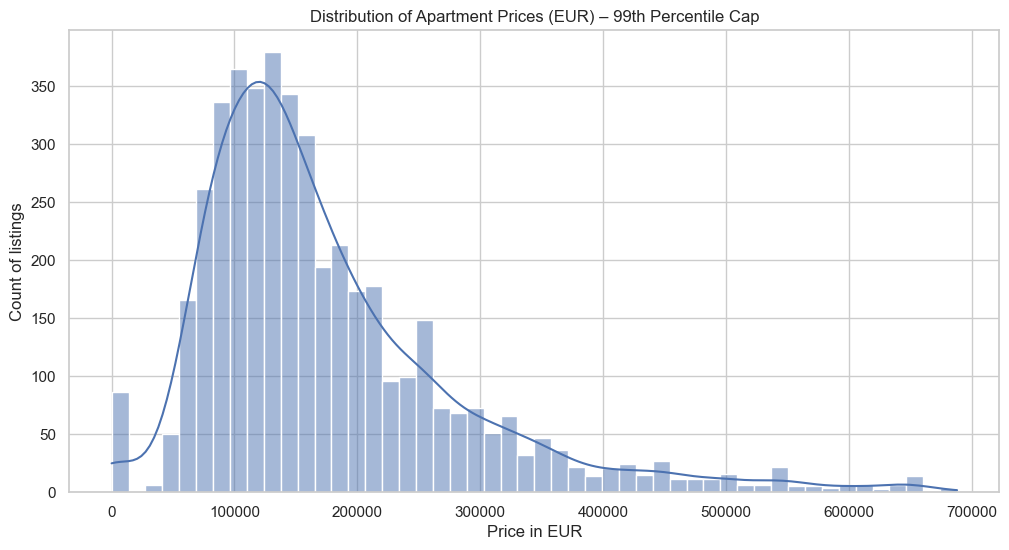

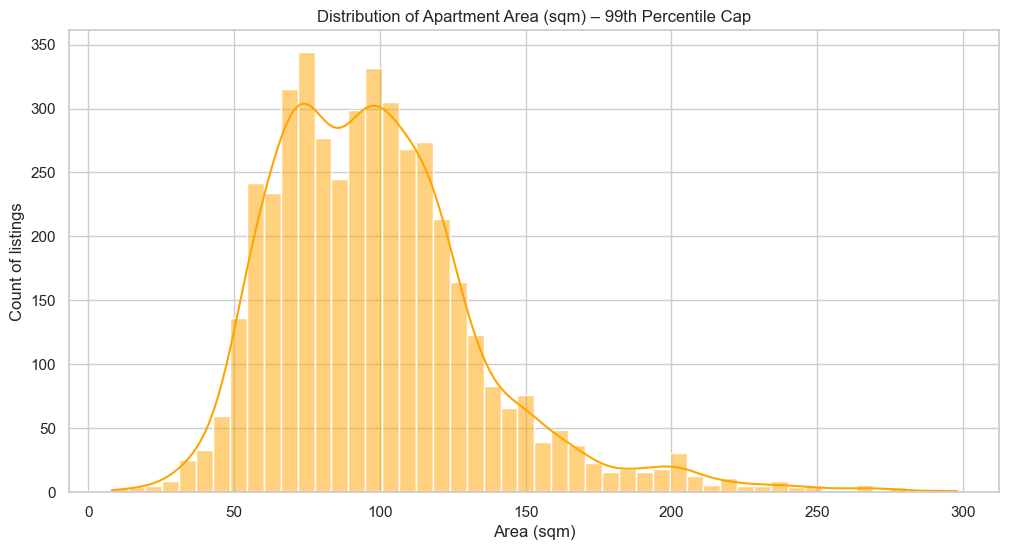

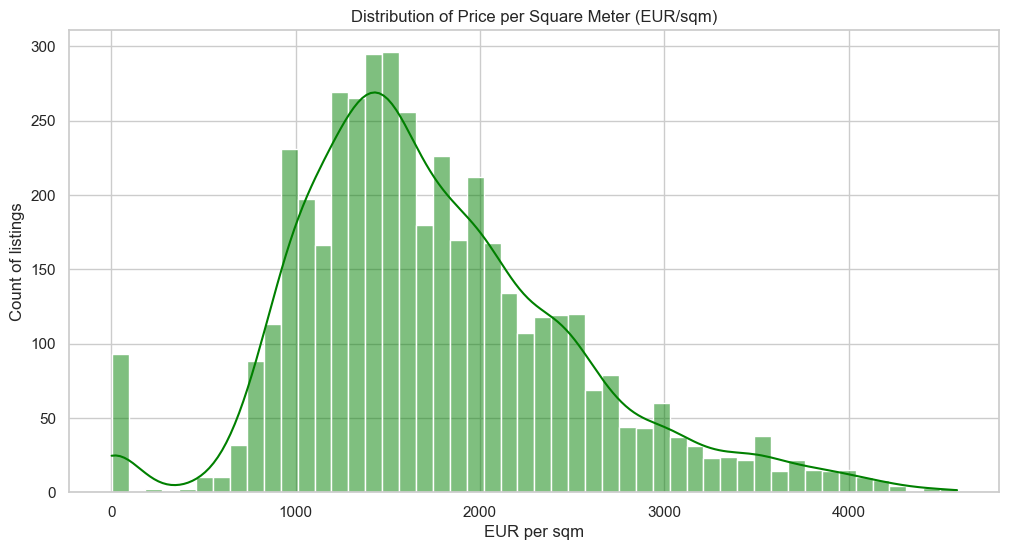

In [7]:
# Histogram of total price in EUR (with upper cap to reduce influence of extreme outliers)
plt.figure()
sns.histplot(data=df_clean[df_clean["price_eur"] < df_clean["price_eur"].quantile(0.99)],
             x="price_eur", bins=50, kde=True)
plt.title("Distribution of Apartment Prices (EUR) – 99th Percentile Cap")
plt.xlabel("Price in EUR")
plt.ylabel("Count of listings")
plt.show()

# Histogram of area in square meters
plt.figure()
sns.histplot(data=df_clean[df_clean["area_sqm"] < df_clean["area_sqm"].quantile(0.99)],
             x="area_sqm", bins=50, kde=True, color="orange")
plt.title("Distribution of Apartment Area (sqm) – 99th Percentile Cap")
plt.xlabel("Area (sqm)")
plt.ylabel("Count of listings")
plt.show()

# Histogram of price per square meter
plt.figure()
sns.histplot(data=df_clean[df_clean["price_per_sqm"] < df_clean["price_per_sqm"].quantile(0.99)],
             x="price_per_sqm", bins=50, kde=True, color="green")
plt.title("Distribution of Price per Square Meter (EUR/sqm)")
plt.xlabel("EUR per sqm")
plt.ylabel("Count of listings")
plt.show()

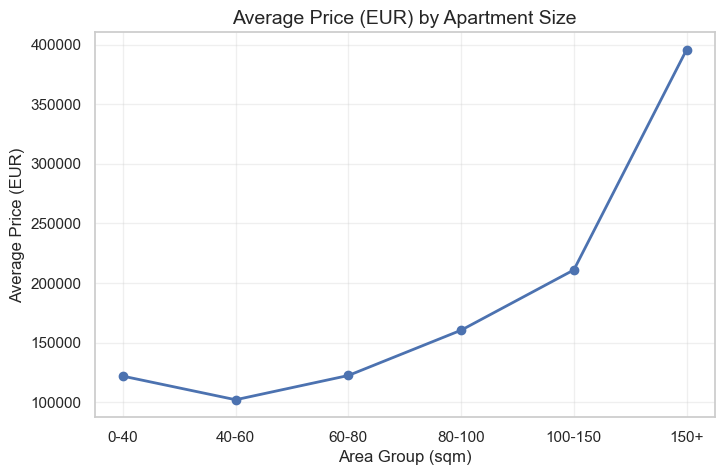

In [8]:
# Create area groups for simpler visualization
df_clean["area_group"] = pd.cut(
    df_clean["area_sqm"],
    bins=[0, 40, 60, 80, 100, 150, 300],
    labels=["0-40", "40-60", "60-80", "80-100", "100-150", "150+"]
)

# Calculate mean price for each group
area_mean = df_clean.groupby("area_group")["price_eur"].mean().reset_index()

# Line chart
plt.figure(figsize=(8,5))
plt.plot(area_mean["area_group"], area_mean["price_eur"], marker="o", linewidth=2)
plt.title("Average Price (EUR) by Apartment Size", fontsize=14)
plt.xlabel("Area Group (sqm)", fontsize=12)
plt.ylabel("Average Price (EUR)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


This chart shows how the average apartment price changes with size, visualizing the trend of increasing price as area increases.

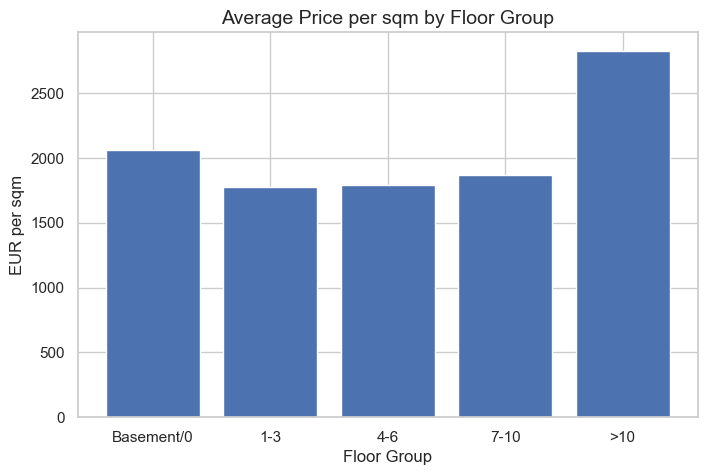

In [9]:
# If floor_group is not created yet:
df_clean["floor_group"] = pd.cut(
    df_clean["floor"],
    bins=[-2, 0, 3, 6, 10, 40],
    labels=["Basement/0", "1-3", "4-6", "7-10", ">10"]
)

# Calculate mean €/m² per floor group
floor_mean = df_clean.groupby("floor_group")["price_per_sqm"].mean().reset_index()

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(floor_mean["floor_group"], floor_mean["price_per_sqm"])
plt.title("Average Price per sqm by Floor Group", fontsize=14)
plt.xlabel("Floor Group", fontsize=12)
plt.ylabel("EUR per sqm", fontsize=12)
plt.show()


This chart shows the average price per square meter for each floor group, indicating how price per sqm varies depending on the apartment’s floor.

### Categorical Variables – Furnishing and City

Furnishing status and city can also influence price. We check how price per square meter behaves across these categorical groups using boxplots.

In [10]:
# Boxplot: Furnishing status vs price per sqm
plt.figure()
sns.boxplot(data=df_clean, x="furnishing_status", y="price_per_sqm")
plt.title("Price per sqm by Furnishing Status")
plt.xlabel("Furnishing status")
plt.ylabel("EUR per sqm")
plt.xticks(rotation=45)
plt.show()



ValueError: Could not interpret value `furnishing_status` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

This chart shows how the price per square meter varies depending on the apartment’s furnishing status (e.g., unfurnished, semi-furnished, fully furnished), highlighting differences in median prices, variability, and outliers for each category.

In [ ]:
# To avoid clutter, keep only the top 5 cities by count
top_cities = df_clean["city"].value_counts().head(5).index
df_top_cities = df_clean[df_clean["city"].isin(top_cities)]

plt.figure()
sns.boxplot(data=df_top_cities, x="city", y="price_per_sqm")
plt.title("Price per sqm for Top 5 Cities")
plt.xlabel("City")
plt.ylabel("EUR per sqm")
plt.xticks(rotation=45)
plt.show()

This chart shows the distribution of price per square meter for the five cities with the most listings, allowing comparison of typical prices, spread, and extreme values across these major cities.

### Correlation Matrix for Numeric Features

Finally, we examine the linear correlations between the main numeric variables, including `price_per_sqm`. This helps identify which factors are most strongly associated with price and price per square meter.

In [ ]:
# Compute correlation matrix for numeric columns
numeric_df = df_clean.select_dtypes(include=["number"])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.5, square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

# Correlations with price_per_sqm
if "price_per_sqm" in corr.columns:
    print("Correlations with price_per_sqm (sorted):")
    print(corr["price_per_sqm"].sort_values(ascending=False))
else:
    print("price_per_sqm not found in correlation matrix.")

## Conclusions

This notebook has:
- Loaded and cleaned apartment listing data from a JSON file.
- Renamed columns to more intuitive English names and created a focused analysis DataFrame.
- Engineered a key feature (price per square meter) and explored its distribution.
- Performed univariate and bivariate EDA, including correlations, to understand the main drivers of apartment prices.

This provides a solid foundation for building a predictive model of apartment prices in a separate notebook if desired.